<img src=https://uniandes.edu.co/sites/default/files/logo-uniandes.png>

Estudiantes:

Integrante 1: David Guillermo Guerrero Calderón 	Código: 201113487

Integrante 2: Jhon Jairo Melo Jiménez 			    Código: 201818750

Integrante 3: Julián David Moreno Marin 			Código: 200822194

Integrante 4: Oscar Iván Castro Buitrago 		    Código: 201315998

Integrante 5: Wilson Camilo Sánchez Forero          Código: 201820379


In [1]:
# Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

Exercise 03 - Autoregressive Integrated Moving Average Models

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
The project must be carried out in the groups assigned in class.
Use clear and rigorous procedures.

Due date: July 11, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
03.1 - Plot and analyze the ACF and PACF of the 4 time series in data_arma.csv:
What do these plots suggest about the data being an AR or MA process?

In [2]:
df_arma = pd.read_csv('data_arma.csv', header=0, index_col=0)

In [3]:
df_arma.head()

,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


In [4]:
from statsmodels.graphics.tsaplots import plot_acf


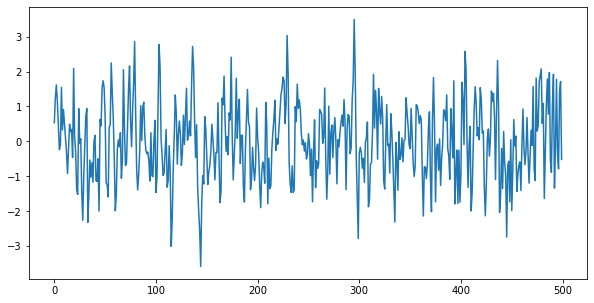

In [5]:
df_arma["ts1"].plot(figsize=(10, 5));

TIME SERIES TS1

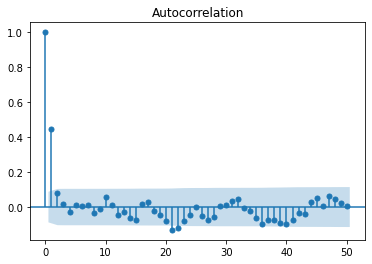

In [6]:
plot_acf(df_arma["ts1"], lags=50);

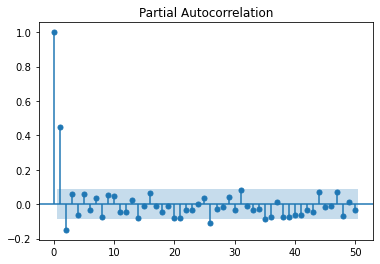

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_arma["ts1"], lags=50);

Conclusión: Para la serie de tiempo TS1 se graficaron la autocorrelación y la autocorrelación parcial en busqueda de difinir si pertenece a un proceso de media movil o a un proceso autoregresivo. En la grafica de autocorrelación se evidencia que posterior al segundo rezago existe un corte abrupto en donde la serie tiende a cero, este hallazgo nos indica que la serie parece corresponder a un proceso de media movil de grado 2.  

TIME SERIES TS2

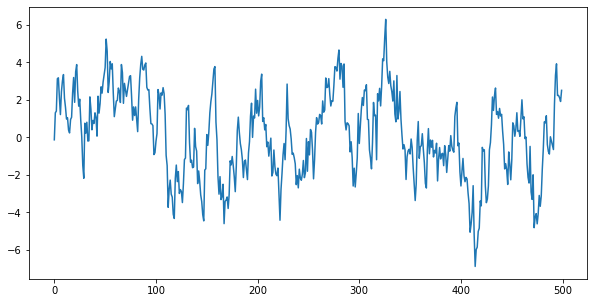

In [8]:
df_arma["ts2"].plot(figsize=(10, 5));

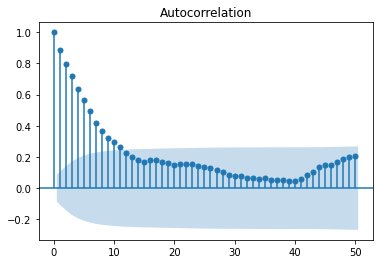

In [9]:
plot_acf(df_arma["ts2"], lags=50);

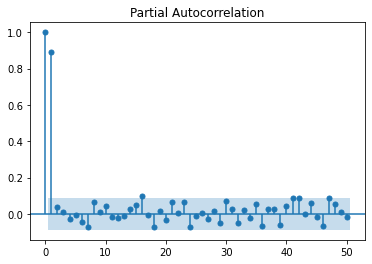

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_arma["ts2"], lags=50);

Conclusión: Para la serie de tiempo TS2 se graficaron la autocorrelación y la autocorrelación parcial en busqueda de difinir si pertenece a un proceso de media movil o a un proceso autoregresivo. En la grafica de autocorrelación se evidencia que los rezagos presentan un decaimiento geometrico suave, este hallazgo nos indica que la serie parece corresponder a un proceso autoregresivo. Posteriormente se interpreto la grafica de autocorrelación parcial en la cual se evidencia que luego del segundo rezago se presenta un corte abruto que nois indica que el proceso autoregresivo para ser de grado 2. 

TIME SERIES TS3

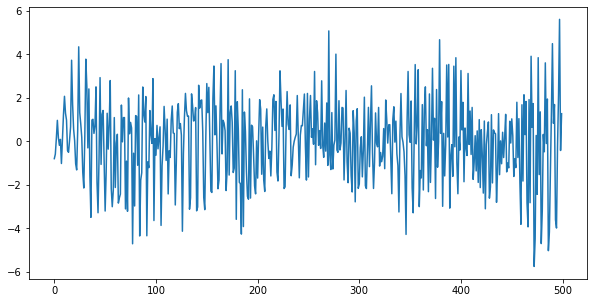

In [11]:
df_arma["ts3"].plot(figsize=(10, 5));

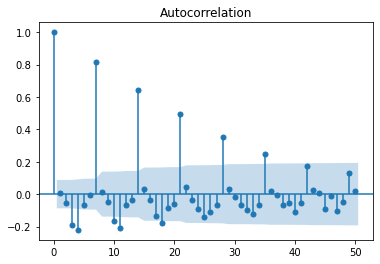

In [12]:
plot_acf(df_arma["ts3"], lags=50);

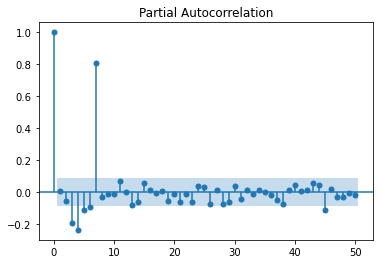

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_arma["ts3"], lags=50);

Conclusión: Para la serie de tiempo TS3 se graficaron la autocorrelación y la autocorrelación parcial en busqueda de difinir si pertenece a un proceso de media movil o a un proceso autoregresivo. En la grafica de autocorrelación se evidencia que los rezagos presentan un decaimiento geometrico suave, este hallazgo nos indica que la serie parece corresponder a un proceso autoregresivo. Posteriormente se interpreto la grafica de autocorrelación parcial en la cual se evidencia entre los primeros 8 rezagos 4 de ellos se diferencias significativamente, por lo que se puede inferer que es un proceso autoregresivo de orden 4.

TIME SERIES TS4

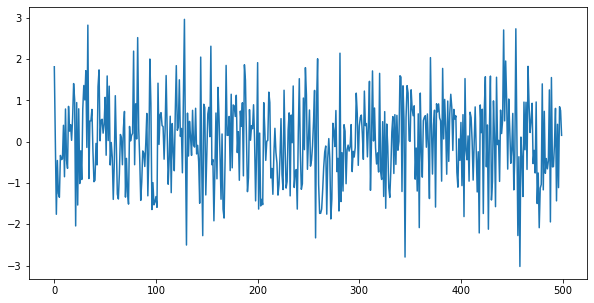

In [14]:
df_arma["ts4"].plot(figsize=(10, 5));

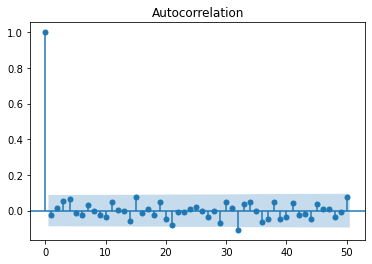

In [15]:
plot_acf(df_arma["ts4"], lags=50);

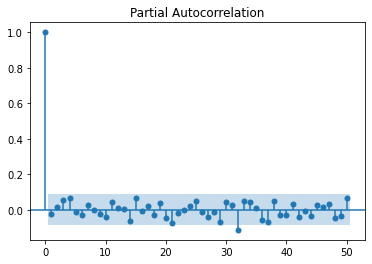

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_arma["ts4"], lags=50);

Conclusión: Para la serie de tiempo TS4 se graficaron la autocorrelación y la autocorrelación parcial en busqueda de difinir si pertenece a un proceso de media movil o a un proceso autoregresivo. En la grafica de autocorrelación se evidencia que posterior al primer rezago existe un corte abrupto en donde la serie tiende a cero, este hallazgo nos indica que la serie parece corresponder a un proceso de media movil de grado 1.  

03.2  SHAMPO DATASET
Using the shampoo dataset:
Find the parameters p, d q that minimize the mean squared error (MSE) of the rolling forecast.

<ipython-input-17-8b5f658fa82d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


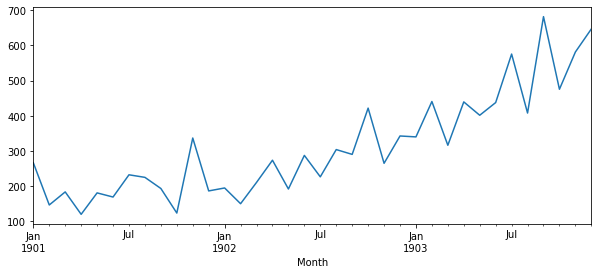

In [17]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 4));

In [18]:
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = (mean_squared_error(test, predictions))
	return mse
 
# evaluate combinations of p, d and q values for an ARIMA model

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

<ipython-input-18-ad690326814a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


ARIMA(0, 0, 0) MSE=52425.271
ARIMA(0, 0, 1) MSE=38257.790
ARIMA(0, 0, 2) MSE=23989.679
ARIMA(0, 0, 3) MSE=24914.846
ARIMA(0, 0, 4) MSE=21007.394
ARIMA(0, 1, 0) MSE=17730.518
ARIMA(0, 1, 1) MSE=10831.968
ARIMA(0, 1, 2) MSE=4670.969
ARIMA(0, 1, 3) MSE=4839.375
ARIMA(0, 1, 4) MSE=5663.521
ARIMA(0, 2, 0) MSE=65120.246
ARIMA(0, 2, 1) MSE=18001.166
ARIMA(0, 2, 2) MSE=5571.813
ARIMA(0, 2, 3) MSE=5581.724
ARIMA(0, 2, 4) MSE=4883.329
ARIMA(0, 3, 0) MSE=253600.373
ARIMA(0, 3, 1) MSE=67347.043
ARIMA(0, 3, 2) MSE=19229.372
ARIMA(0, 3, 3) MSE=7178.403
ARIMA(0, 3, 4) MSE=5393.665
ARIMA(0, 4, 0) MSE=969128.824
ARIMA(0, 4, 1) MSE=262895.723
ARIMA(0, 4, 2) MSE=73024.440
ARIMA(0, 4, 3) MSE=27678.070
ARIMA(0, 4, 4) MSE=10088.952
ARIMA(1, 0, 0) MSE=23112.493
ARIMA(1, 0, 1) MSE=12496.420
ARIMA(1, 0, 2) MSE=5926.888
ARIMA(1, 0, 3) MSE=10806.544
ARIMA(1, 0, 4) MSE=8568.043
ARIMA(1, 1, 0) MSE=7855.443
ARIMA(1, 1, 1) MSE=7733.869
ARIMA(1, 1, 2) MSE=8278.524
ARIMA(1, 1, 3) MSE=6371.714
ARIMA(1, 1, 4) MSE=5665.2

Usando funciones para evaluar el modelo ARIMA e iterar los diferentes parámetros de manera automática, se consideraron los valores de parámetros:

p_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

d_values = range(0, 5)

q_values = range(0, 5)

Y así encontramos que los parámetros que minimizan el MSE corresponden a p=5, d=3 y q=3 con un MSE de 3854.154



Referencias: Las funciones para la iteración y halllar los valores mínimos de los parámetros p, d y q, para el caso del shampoo, se tomaron de la página: https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/